# Connected Labeling

(512, 512)

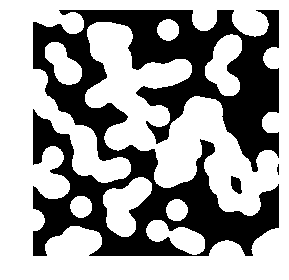

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color, morphology, data

# ignore warning messages
import warnings
warnings.filterwarnings('ignore')

img_bw = data.binary_blobs()

#img = io.imread('https://homepages.inf.ed.ac.uk/rbf/HIPR2/images/art8.gif')
#img = img > 150
#img_bw = util.img_as_bool(img)
# a must read to conver image format "http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.img_as_bool"

io.imshow(img_bw)
plt.axis('off')
img_bw.shape

## Number of Labeled objects

In [2]:
labeled_img, labels= morphology.label(img_bw, 8, return_num='True')
print("Numbers of objects in the image =", labels)

Numbers of objects in the image = 16


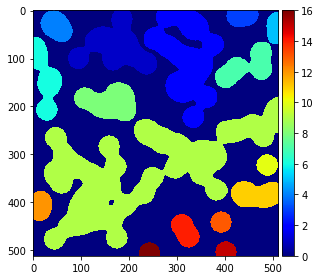

In [3]:
io.imshow(labeled_img, cmap = 'jet')

## A good read regarding pixel connectivity for object segmentation

[coin segmentation code jupyter notebook](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html)

# Filtering operation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, filters, morphology
from skimage.filters import rank
from skimage.morphology import square, disk

## Averaging filter

(-0.5, 936.5, 1271.5, -0.5)

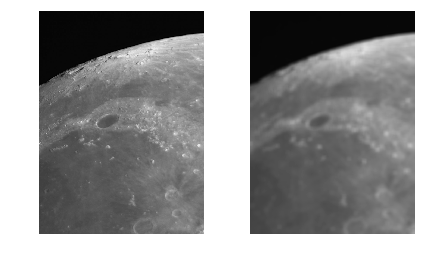

In [5]:
plt.subplot(1,2,1)
img = color.rgb2gray(io.imread('http://astropetros.eu/wp/wp-content/uploads/2017/06/Moon_213655_g4_ap558_proc.jpg'))
io.imshow(img)
plt.axis('off')


plt.subplot(1,2,2)
img_mean = rank.mean(img, square(25))
io.imshow(img_mean)
plt.axis('off')

## Edge detection using laplacian filter

(0.0, 1.0, 0.0, 1.0)

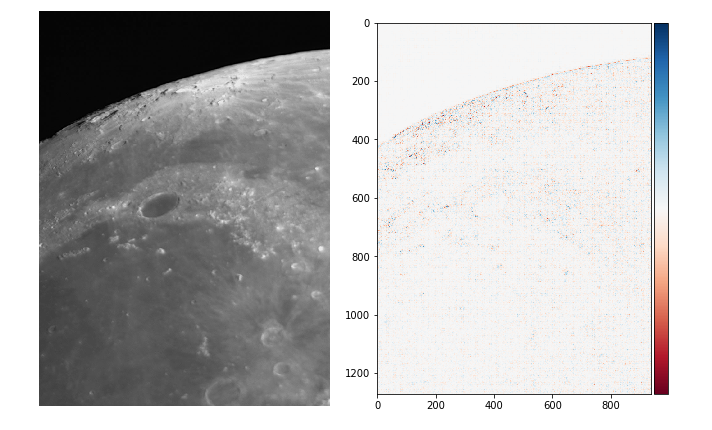

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
io.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
laplace_edges = filters.laplace(img)
io.imshow(laplace_edges)
plt.axis('off')

## Gradient edge detection
[Filters documentation](http://scikit-image.org/docs/dev/api/skimage.filters.html)


(-0.5, 936.5, 1271.5, -0.5)

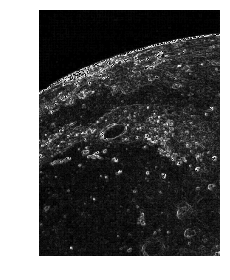

In [7]:
img_gradient = rank.gradient(img, square(5))
io.imshow(img_gradient*4) 
# 4 is multiplied to just show the edges on projector
plt.axis('off')

## Noise modeling and removal

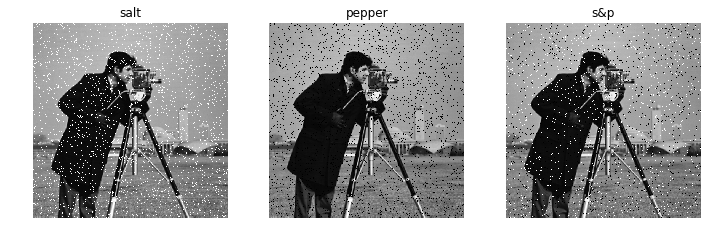

In [8]:
img = data.camera()


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
io.imshow(img)
plt.axis('off')

from skimage import util


# noise models
noise_models = ['salt', 'pepper', 's&p']

def plot_noisy_images(noise_models):
  for i in range(len(noise_models)):
    plt.subplot(1,len(noise_models), i+1)
    io.imshow(util.random_noise(img, noise_models[i]))
    plt.axis('off')
    plt.title(noise_models[i])
    
    
plot_noisy_images(noise_models)

## Apply filters to remove noise

### Minimum Filter

Text(0.5,1,'Minimum filter: Denoised Image')

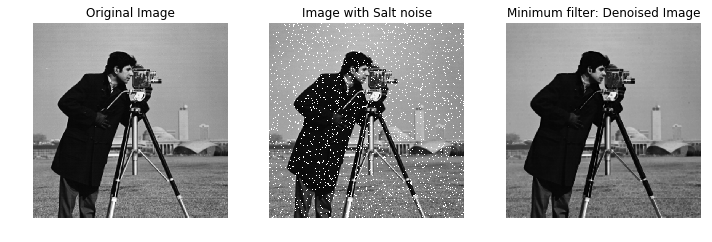

In [9]:
salt_noise_img = util.random_noise(img,'salt')
pepper_noise_img = util.random_noise(img,'pepper')
noisy_img = util.random_noise(img,'s&p')


min_denoise_salt = rank.minimum(salt_noise_img, square(3))

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
io.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(3,3,2)
io.imshow(salt_noise_img)
plt.axis('off')
plt.title('Image with Salt noise')


plt.subplot(3,3,3)
io.imshow(min_denoise_salt)
plt.axis('off')
plt.title('Minimum filter: Denoised Image')

### Maximum Filter

Text(0.5,1,'Maximum filter: Denoised Image')

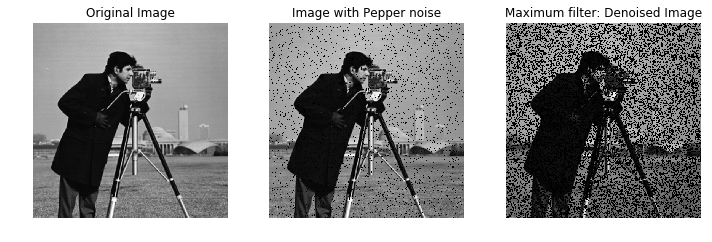

In [10]:
max_denoise_pepper = rank.minimum(pepper_noise_img, square(3))

plt.figure(figsize=(10,10))
plt.subplot(3,3,4)
io.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(3,3,5)
io.imshow(pepper_noise_img)
plt.axis('off')
plt.title('Image with Pepper noise')


plt.subplot(3,3,6)
io.imshow(max_denoise_pepper)
plt.axis('off')
plt.title('Maximum filter: Denoised Image')

### Median Filter

Text(0.5,1,'Median filter: Denoised Image')

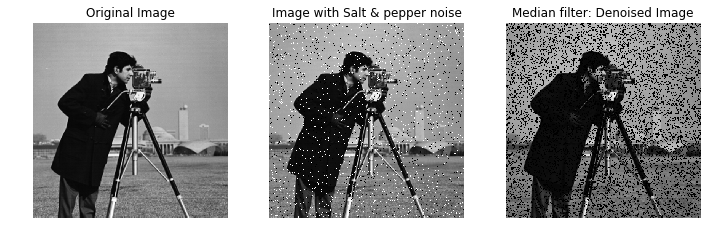

In [11]:
denoised_iamge = rank.minimum(noisy_img, square(3))

plt.figure(figsize=(10,10))
plt.subplot(3,3,7)
io.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(3,3,8)
io.imshow(noisy_img)
plt.axis('off')
plt.title('Image with Salt & pepper noise')


plt.subplot(3,3,9)
io.imshow(denoised_iamge)
plt.axis('off')
plt.title('Median filter: Denoised Image')

## Questions
...
## Thank you